## Análise do perfil da população carcerária - Dados Sisdepen 1º SEM23

#### Link dos dados: https://www.gov.br/senappen/pt-br/servicos/sisdepen/bases-de-dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as pandasql
from pandasql import sqldf

In [2]:
df = pd.DataFrame(pd.read_excel("C:/Users/mih98/Downloads/Projeto TCC - Análise de Correspondecia/14o-ciclo-base-de-dados-2023-1-semestre.xlsx"))

In [3]:
df

,nome_estabelecimento,ambito,uf,municipio,popu_prisi_preso_provi_s_condenacao,popu_prisi_preso_sentenc_fechado,popu_prisi_preso_sentenc_semi_aberto,popu_prisi_preso_sentenc_aberto,popu_prisi_med_seg_intern,popu_prisi_med_seg_trat_amb,...,qt_preso_ens_sup_comp_total,qt_preso_ens_acima_sup_comp_masc,qt_preso_ens_acima_sup_comp_fem,qt_preso_ens_acima_sup_comp_total,qt_preso_ens_n_informado_masc,qt_preso_ens_n_informado_fem,qt_preso_ens_n_informado_total,qt_preso_ens_masc,qt_preso_ens_fem,qt_preso_ens_total
0,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,Estadual,AC,Brasileia,13.0,0.0,164.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,16.0,177.0
1,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,Estadual,AC,Cruzeiro do Sul,50.0,NaN,209.0,NaN,NaN,NaN,...,6.0,0.0,0.0,0.0,17.0,1.0,18.0,219.0,40.0,259.0
2,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,Estadual,AC,Feijó,106.0,0.0,50.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,24.0,156.0
3,NÚCLEO DE MONITORAMENTO ELETRONICO DOMICILIAR ...,Estadual,AC,Sena Madureira,66.0,0.0,150.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NÚCLEO DE MONITORAMENTO ELETRÔNICO DOMICILIAR ...,Estadual,AC,Tarauacá,39.0,0.0,85.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,12.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,Penitenciária Federal em Brasília,Federal,DF,Brasília,3.0,43.0,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,0.0,0.0,NaN,0.0,46.0,NaN,46.0
1536,Penitenciária Federal em Campo Grande,Federal,MS,Campo Grande,13.0,101.0,NaN,NaN,NaN,1.0,...,2.0,0.0,NaN,0.0,2.0,NaN,2.0,115.0,NaN,115.0
1537,Penitenciária Federal em Catanduvas,Federal,PR,Catanduvas,9.0,117.0,0.0,0.0,0.0,0.0,...,2.0,0.0,NaN,0.0,10.0,NaN,10.0,126.0,NaN,126.0
1538,Penitenciária Federal em Mossoró,Federal,RN,Mossoró,3.0,65.0,0.0,0.0,0.0,0.0,...,6.0,0.0,NaN,0.0,0.0,NaN,0.0,68.0,NaN,68.0


### Gráfico de distribuição da população prisional por UF

In [4]:
#CRIANDO NOVO DATAFRAME SOMENTE COM AS INFOS DE UF E POPULAÇÃO PRISIONAL
df_popu_uf = df[['uf', 'popu_prisi_total']]
df_popu_uf

,uf,popu_prisi_total
0,AC,177
1,AC,259
2,AC,156
3,AC,216
4,AC,124
...,...,...
1535,DF,46
1536,MS,115
1537,PR,126
1538,RN,68


In [5]:
#SOMANDO A POPULAÇÃO PRISIONAL POR UF
df_popu_uf_total = df_popu_uf.groupby(['uf']).agg({'popu_prisi_total':'sum'}).reset_index()
df_popu_uf_total

,uf,popu_prisi_total
0,AC,5913
1,AL,12605
2,AM,10692
3,AP,2692
4,BA,14219
5,CE,37946
6,DF,28132
7,ES,23581
8,GO,28611
9,MA,12930


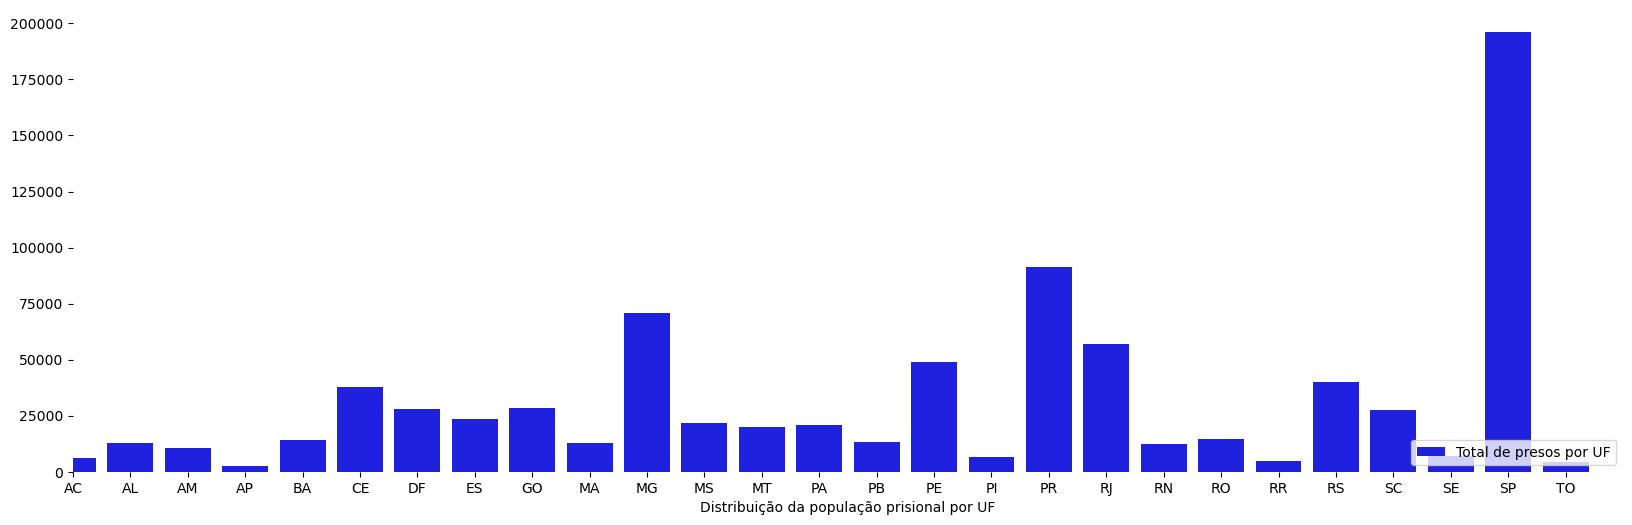

In [25]:
#GRÁFICO PARA DISTRIBUIÇÃO DA POPULAÇÃO PRISIONAL POR UF
f, ax = plt.subplots(figsize=(20,6))
sns.barplot(x="uf", y="popu_prisi_total", data=df_popu_uf_total,
           label="Total de presos por UF", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,27), ylabel="",
      xlabel="Distribuição da população prisional por UF")
sns.despine(left=True, bottom=True)

plt.savefig('prisoes_uf.png', dpi=300, bbox_inches='tight')

### Gráfico de distribuição da população prisional por âmbito prisional

In [15]:
df['ambito'].describe()

count         1540
unique           2
top       Estadual
freq          1535
Name: ambito, dtype: object

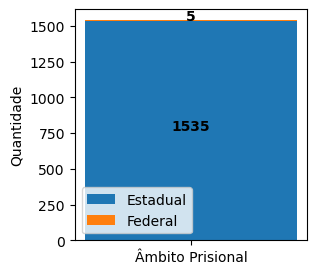

In [24]:
import matplotlib.pyplot as plt

# Data
groups = ['Âmbito Prisional']
estadual = [1535]
federal = [5]

fig, ax = plt.subplots(figsize=(3, 3))

# Stacked bar chart
ax.bar(groups, estadual, label = "Estadual")
ax.bar(groups, federal, bottom = estadual, label = "Federal")

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'black', weight = 'bold', size = 10)

ax.legend()
ax.set_ylabel('Quantidade')

plt.savefig('ambito.png', dpi=300, bbox_inches='tight')

# plt.show() 

### Gráfico de distribuição da população prisional por sentença

In [26]:
#CRIANDO NOVO DATAFRAME COM A SOMA DA POPULAÇÃO PRISIONAL POR SENTENÇA
df1 = df[['popu_prisi_preso_provi_s_condenacao', 'popu_prisi_preso_sentenc_fechado', 'popu_prisi_preso_sentenc_semi_aberto', 'popu_prisi_preso_sentenc_aberto','popu_prisi_med_seg_intern','popu_prisi_med_seg_trat_amb']]
df1

,popu_prisi_preso_provi_s_condenacao,popu_prisi_preso_sentenc_fechado,popu_prisi_preso_sentenc_semi_aberto,popu_prisi_preso_sentenc_aberto,popu_prisi_med_seg_intern,popu_prisi_med_seg_trat_amb
0,13.0,0.0,164.0,0.0,0.0,0.0
1,50.0,NaN,209.0,NaN,NaN,NaN
2,106.0,0.0,50.0,0.0,0.0,0.0
3,66.0,0.0,150.0,0.0,0.0,0.0
4,39.0,0.0,85.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1535,3.0,43.0,NaN,NaN,NaN,NaN
1536,13.0,101.0,NaN,NaN,NaN,1.0
1537,9.0,117.0,0.0,0.0,0.0,0.0
1538,3.0,65.0,0.0,0.0,0.0,0.0


In [27]:
#TOTAL DE PRESOS POR SENTENÇA
df2 = df1.sum(numeric_only=True)
df2

popu_prisi_preso_provi_s_condenacao     209188.0
popu_prisi_preso_sentenc_fechado        340365.0
popu_prisi_preso_sentenc_semi_aberto    182071.0
popu_prisi_preso_sentenc_aberto         100487.0
popu_prisi_med_seg_intern                 2177.0
popu_prisi_med_seg_trat_amb                586.0
dtype: float64

In [28]:
distribuicao_sentenca = [['Presos provisórios (sem condenação)', 209188.0],
                         ['Presos sentenciados - regime fechado', 340365.0],
                         ['Presos sentenciados - regime semiaberto', 182071.0],
                         ['Presos sentenciados - regime aberto', 100487.0],
                         ['Medida de segurança - internação', 2177.0],
                         ['Medida de segurança - tratamento ambulatorial', '586.0']]
df_popu_sentenca = pd.DataFrame(distribuicao_sentenca, columns=['Regime', 'Total'])
df_popu_sentenca

,Regime,Total
0,Presos provisórios (sem condenação),209188.0
1,Presos sentenciados - regime fechado,340365.0
2,Presos sentenciados - regime semiaberto,182071.0
3,Presos sentenciados - regime aberto,100487.0
4,Medida de segurança - internação,2177.0
5,Medida de segurança - tratamento ambulatorial,586.0


In [29]:
df_popu_sentenca['Total'] = df_popu_sentenca['Total'].astype(float)

In [30]:
df_popu_sentenca.dtypes

Regime     object
Total     float64
dtype: object

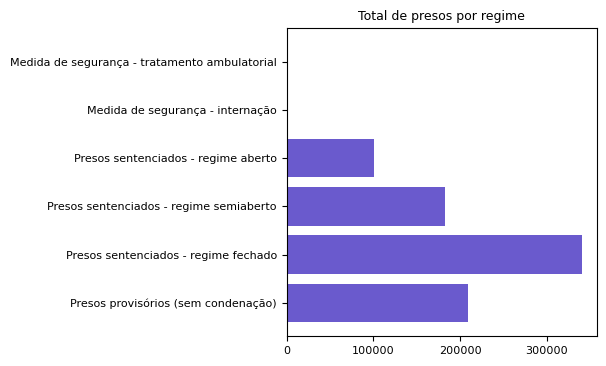

In [32]:
# creating the dataset
data = {'Presos provisórios (sem condenação)': 209188.0, 'Presos sentenciados - regime fechado': 340365.0, 
        'Presos sentenciados - regime semiaberto': 182071.0, 'Presos sentenciados - regime aberto': 100487.0, 
        'Medida de segurança - internação': 2177.0, 'Medida de segurança - tratamento ambulatorial': 586.0}
 
faixa = list(data.keys())
total = list(data.values())
 
fig = plt.figure(figsize=(4, 4))
 
# creating the bar plot
plt.barh(faixa, total, color='slateblue')
 
#plt.xlabel("Total de presos por faixa etária")
#plt.ylabel("No. of students enrolled")
plt.title("Total de presos por regime", fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('preso_regime.png', dpi=300, bbox_inches='tight')
plt.show()

### Gráfico de distribuição de pessoas privadas de liberdade por faixa etária 

In [33]:
#CRIANDO NOVO DATAFRAME COM A SOMA DA POPULAÇÃO PRISIONAL POR IDADE
df3 = df[['qt_preso_fx_18_24_total', 'qt_preso_fx_25_29_total', 'qt_preso_fx_30_34_total', 'qt_preso_fx_35_45_total', 'qt_preso_fx_46_60_total', 'qt_preso_fx_61_70_total', 'qt_preso_fx_acima_70_total']]
df3

,qt_preso_fx_18_24_total,qt_preso_fx_25_29_total,qt_preso_fx_30_34_total,qt_preso_fx_35_45_total,qt_preso_fx_46_60_total,qt_preso_fx_61_70_total,qt_preso_fx_acima_70_total
0,42.0,47.0,31.0,36.0,17.0,3.0,1.0
1,39.0,76.0,56.0,59.0,23.0,2.0,2.0
2,54.0,44.0,27.0,14.0,9.0,1.0,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.0,39.0,21.0,23.0,5.0,2.0,1.0
...,...,...,...,...,...,...,...
1535,0.0,0.0,6.0,16.0,20.0,4.0,0.0
1536,1.0,3.0,19.0,63.0,20.0,0.0,0.0
1537,0.0,5.0,24.0,69.0,27.0,0.0,0.0
1538,0.0,2.0,16.0,30.0,19.0,1.0,0.0


In [34]:
#TOTAL DE PRESOS POR SENTENÇA
df4 = df3.sum(numeric_only=True)
df4

qt_preso_fx_18_24_total       134273.0
qt_preso_fx_25_29_total       171888.0
qt_preso_fx_30_34_total       143364.0
qt_preso_fx_35_45_total       191530.0
qt_preso_fx_46_60_total        76418.0
qt_preso_fx_61_70_total        13066.0
qt_preso_fx_acima_70_total      3141.0
dtype: float64

In [35]:
distribuicao_idade = [['Presos entre 18 a 24 anos', 134273.0],
                         ['Presos entre 25 a 29 anos', 171888.0],
                         ['Presos entre 30 a 34 anos', 143364.0],
                         ['Presos entre 35 a 45 anos', 191530.0],
                         ['Presos entre 46 a 60 anos', 76418.0],
                         ['Presos entre 61 a 70 anos', 13066.0],
                         ['Presos acima de 70 anos', 3141.0]]
df_popu_idade = pd.DataFrame(distribuicao_idade, columns=['Faixa etária', 'Total'])
df_popu_idade

,Faixa etária,Total
0,Presos entre 18 a 24 anos,134273.0
1,Presos entre 25 a 29 anos,171888.0
2,Presos entre 30 a 34 anos,143364.0
3,Presos entre 35 a 45 anos,191530.0
4,Presos entre 46 a 60 anos,76418.0
5,Presos entre 61 a 70 anos,13066.0
6,Presos acima de 70 anos,3141.0


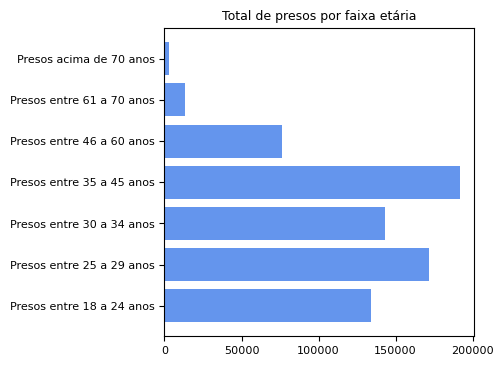

In [36]:
# creating the dataset
data = {'Presos entre 18 a 24 anos': 134273.0, 'Presos entre 25 a 29 anos': 171888.0, 'Presos entre 30 a 34 anos': 143364.0,
        'Presos entre 35 a 45 anos': 191530.0, 'Presos entre 46 a 60 anos': 76418.0, 'Presos entre 61 a 70 anos': 13066.0, 
        'Presos acima de 70 anos': 3141.0}
 
faixa = list(data.keys())
total = list(data.values())
 
fig = plt.figure(figsize=(4, 4))
 
# creating the bar plot
plt.barh(faixa, total, color='cornflowerblue')
 
#plt.xlabel("Total de presos por faixa etária")
#plt.ylabel("No. of students enrolled")
plt.title("Total de presos por faixa etária", fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('preso_idade.png', dpi=300, bbox_inches='tight')
plt.show()

### Gráfico de distribuição de pessoas privadas de liberdade por cor de pele/raça/etnia

In [37]:
#CRIANDO NOVO DATAFRAME COM A SOMA DA POPULAÇÃO PRISIONAL POR RAÇA/ETNIA
df5 = df[['qt_preso_pele_branca_total', 'qt_preso_pele_preta_total', 'qt_preso_pele_parda_total', 'qt_preso_pele_amarela_total', 'qt_preso_pele_indigena_total', 'qt_preso_pele_n_informado_total']]
df5

,qt_preso_pele_branca_total,qt_preso_pele_preta_total,qt_preso_pele_parda_total,qt_preso_pele_amarela_total,qt_preso_pele_indigena_total,qt_preso_pele_n_informado_total
0,NaN,22.0,155.0,NaN,NaN,NaN
1,40.0,45.0,156.0,3.0,4.0,11.0
2,21.0,10.0,120.0,0.0,5.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,14.0,10.0,91.0,5.0,4.0,0.0
...,...,...,...,...,...,...
1535,18.0,5.0,19.0,0.0,0.0,0.0
1536,46.0,7.0,60.0,0.0,0.0,2.0
1537,39.0,17.0,58.0,2.0,0.0,10.0
1538,24.0,10.0,31.0,0.0,0.0,3.0


In [38]:
#TOTAL DE PRESOS POR RAÇA/ETNIA
df6 = df5.sum(numeric_only=True)
df6

qt_preso_pele_branca_total         201525.0
qt_preso_pele_preta_total          111345.0
qt_preso_pele_parda_total          349680.0
qt_preso_pele_amarela_total          6909.0
qt_preso_pele_indigena_total         1542.0
qt_preso_pele_n_informado_total     34908.0
dtype: float64

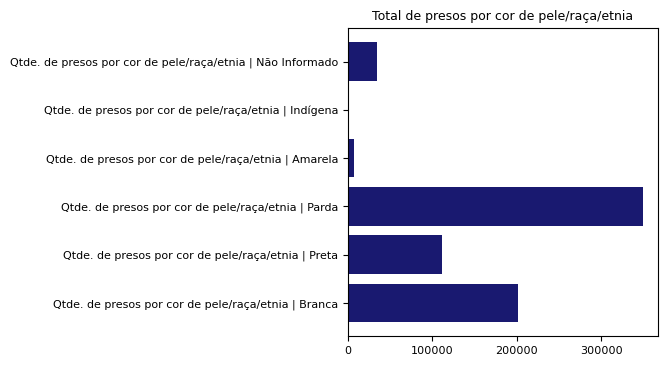

In [39]:
# creating the dataset
data = {'Qtde. de presos por cor de pele/raça/etnia | Branca': 201525.0, 
        'Qtde. de presos por cor de pele/raça/etnia | Preta': 111345.0, 
        'Qtde. de presos por cor de pele/raça/etnia | Parda': 349680.0,
        'Qtde. de presos por cor de pele/raça/etnia | Amarela': 6909.0, 
        'Qtde. de presos por cor de pele/raça/etnia | Indígena': 1542.0, 
        'Qtde. de presos por cor de pele/raça/etnia | Não Informado': 34908.0
       }
 
cor = list(data.keys())
total = list(data.values())
 
fig = plt.figure(figsize=(4, 4))
 
# creating the bar plot
plt.barh(cor, total, color='midnightblue')
 
#plt.xlabel("Total de presos por faixa etária")
#plt.ylabel("No. of students enrolled")
plt.title("Total de presos por cor de pele/raça/etnia", fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.savefig('preso_raca.png', dpi=300, bbox_inches='tight')
plt.show()

### Gráfico de distribuição de pessoas privadas de liberdade por procedência

In [21]:
#CRIANDO NOVO DATAFRAME COM A SOMA DA POPULAÇÃO PRISIONAL POR PROCEDÊNCIA
df7 = df[['qt_preso_area_urb_interior_masc', 'qt_preso_area_urb_interior_fem', 'qt_preso_area_urb_reg_metrop_masc', 'qt_preso_area_urb_reg_metrop_fem', 'qt_preso_zona_rural_masc', 'qt_preso_zona_rural_fem']]
df7

,qt_preso_area_urb_interior_masc,qt_preso_area_urb_interior_fem,qt_preso_area_urb_reg_metrop_masc,qt_preso_area_urb_reg_metrop_fem,qt_preso_zona_rural_masc,qt_preso_zona_rural_fem
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,105.0,20.0,0.0,0.0,27.0,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1535,3.0,NaN,43.0,NaN,0.0,NaN
1536,NaN,NaN,NaN,NaN,NaN,NaN
1537,NaN,NaN,NaN,NaN,NaN,NaN
1538,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#TOTAL DE PRESOS POR PROCEDÊNCIA
df8 = df7.sum(numeric_only=True)
df8

qt_preso_area_urb_interior_masc      176979.0
qt_preso_area_urb_interior_fem        10407.0
qt_preso_area_urb_reg_metrop_masc    199430.0
qt_preso_area_urb_reg_metrop_fem      10243.0
qt_preso_zona_rural_masc              19217.0
qt_preso_zona_rural_fem                 613.0
dtype: float64

In [23]:
area_interior = [['Área Urbana - Municípios do Interior | Masculino', 176979.0],
                 ['Área Urbana - Municípios do Interior | Feminino', 10407.0]]
df_area_interior = pd.DataFrame(area_interior, columns=['Area Procedencia', 'Total'])
df_area_interior

,Area Procedencia,Total
0,Área Urbana - Municípios do Interior | Masculino,176979.0
1,Área Urbana - Municípios do Interior | Feminino,10407.0


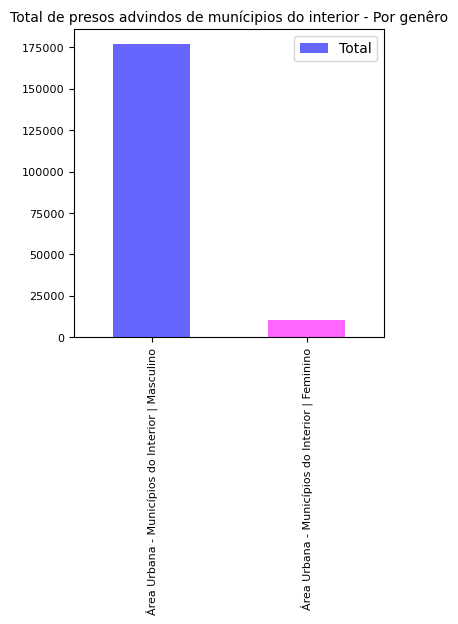

In [24]:
df_area_interior.plot.bar(x="Area Procedencia", y="Total", color=['blue','magenta'], alpha=0.6, figsize=(4,4))

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Total de presos advindos de munícipios do interior - Por genêro", fontsize=10)
plt.legend(loc=1)
plt.xlabel(None)
plt.show()

In [25]:
area_metropolitana = [['Área Urbana - Municípios em Regiões Metropolitanas | Masculino', 199430.0],
                 ['Área Urbana - Municípios em Regiões Metropolitanas | Feminino', 10243.0]]
df_area_metropolitana = pd.DataFrame(area_metropolitana, columns=['Area Procedencia', 'Total'])
df_area_metropolitana

,Area Procedencia,Total
0,Área Urbana - Municípios em Regiões Metropolit...,199430.0
1,Área Urbana - Municípios em Regiões Metropolit...,10243.0


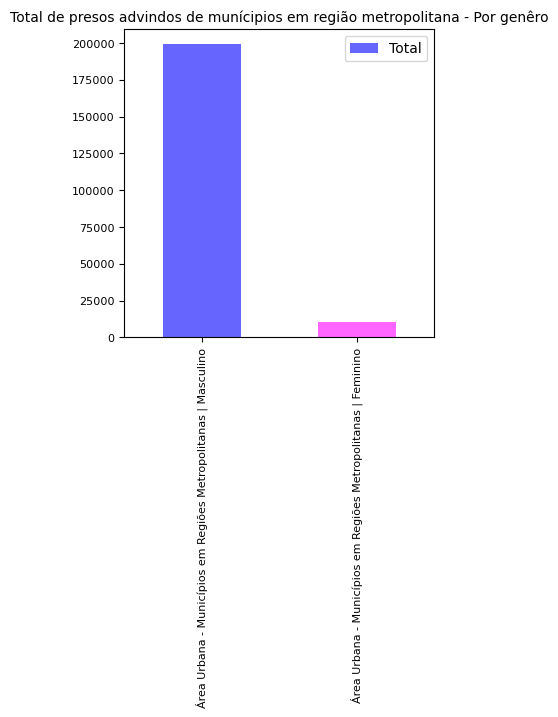

In [26]:
df_area_metropolitana.plot.bar(x="Area Procedencia", y="Total", color=['blue','magenta'], alpha=0.6, figsize=(4,4))

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Total de presos advindos de munícipios em região metropolitana - Por genêro", fontsize=10)
plt.legend(loc=1)
plt.xlabel(None)
plt.show()

In [27]:
area_rural = [['Zona Rural | Masculino', 19217.0],
                 ['Zona Rural | Feminino', 613.0]]
df_area_rural = pd.DataFrame(area_rural, columns=['Area Procedencia', 'Total'])
df_area_rural

,Area Procedencia,Total
0,Zona Rural | Masculino,19217.0
1,Zona Rural | Feminino,613.0


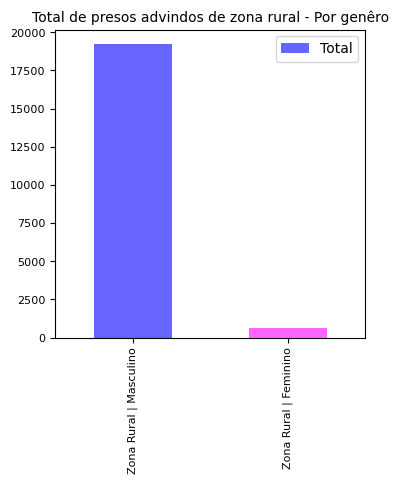

In [28]:
df_area_rural.plot.bar(x="Area Procedencia", y="Total", color=['blue','magenta'], alpha=0.6, figsize=(4,4))

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Total de presos advindos de zona rural - Por genêro", fontsize=10)
plt.legend(loc=1)
plt.xlabel(None)
plt.show()

### Gráfico de distribuição de pessoas privadas de liberdade por grau de instrução

In [40]:
#CRIANDO NOVO DATAFRAME COM A SOMA DA POPULAÇÃO PRISIONAL POR PROCEDÊNCIA
df8 = df[['qt_preso_analfabeto_total', 'qt_preso_alfabetizado_s_c_reg_total', 'qt_preso_ens_fund_incomp_total', 'qt_preso_ens_fund_comp_total', 'qt_preso_ens_med_incomp_total', 'qt_preso_ens_med_comp_total', 'qt_preso_ens_sup_incomp_total', 'qt_preso_ens_sup_comp_total', 'qt_preso_ens_acima_sup_comp_total', 'qt_preso_ens_n_informado_total']]
df8

,qt_preso_analfabeto_total,qt_preso_alfabetizado_s_c_reg_total,qt_preso_ens_fund_incomp_total,qt_preso_ens_fund_comp_total,qt_preso_ens_med_incomp_total,qt_preso_ens_med_comp_total,qt_preso_ens_sup_incomp_total,qt_preso_ens_sup_comp_total,qt_preso_ens_acima_sup_comp_total,qt_preso_ens_n_informado_total
0,4.0,15.0,105.0,16.0,22.0,14.0,1.0,0.0,0.0,0.0
1,15.0,1.0,78.0,23.0,56.0,51.0,11.0,6.0,0.0,18.0
2,15.0,20.0,53.0,15.0,34.0,15.0,1.0,3.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.0,21.0,36.0,7.0,31.0,14.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1535,1.0,0.0,3.0,1.0,8.0,31.0,1.0,1.0,0.0,0.0
1536,1.0,0.0,26.0,7.0,23.0,51.0,3.0,2.0,0.0,2.0
1537,3.0,0.0,18.0,25.0,5.0,59.0,4.0,2.0,0.0,10.0
1538,0.0,0.0,18.0,2.0,11.0,26.0,5.0,6.0,0.0,0.0


In [41]:
#TOTAL DE PRESOS POR RAÇA/ETNIA
df9 = df8.sum(numeric_only=True)
df9

qt_preso_analfabeto_total               17165.0
qt_preso_alfabetizado_s_c_reg_total     29586.0
qt_preso_ens_fund_incomp_total         326615.0
qt_preso_ens_fund_comp_total            78853.0
qt_preso_ens_med_incomp_total          119963.0
qt_preso_ens_med_comp_total             88533.0
qt_preso_ens_sup_incomp_total            9541.0
qt_preso_ens_sup_comp_total              5973.0
qt_preso_ens_acima_sup_comp_total         807.0
qt_preso_ens_n_informado_total          47828.0
dtype: float64

In [42]:
grau_instrucao = [['Qtde de presos por grau de instrução | Analfabeto', 17165.0],
                 ['Qtde de presos por grau de instrução | Alfabetizado (sem cursos regulares)', 29586.0],
                  ['Qtde de presos por grau de instrução | Ensino Fundamental Incompleto', 326615.0],
                  ['Qtde de presos por grau de instrução | Ensino Fundamental Completo', 78853.0],
                  ['Qtde de presos por grau de instrução | Ensino Médio Incompleto', 119963.0],
                  ['Qtde de presos por grau de instrução | Ensino Médio Completo', 88533.0],
                  ['Qtde de presos por grau de instrução | Ensino Superior Incompleto', 9541.0],
                  ['Qtde de presos por grau de instrução | Ensino Superior Completo', 5973.0],
                  ['Qtde de presos por grau de instrução | Ensino acima de Superior Completo', 807.0],
                  ['Qtde de presos por grau de instrução | Não Informado', 47828.0]]
df_grau_instrucao = pd.DataFrame(grau_instrucao, columns=['Grau de Instrução', 'Total'])
df_grau_instrucao

,Grau de Instrução,Total
0,Qtde de presos por grau de instrução | Analfabeto,17165.0
1,Qtde de presos por grau de instrução | Alfabet...,29586.0
2,Qtde de presos por grau de instrução | Ensino ...,326615.0
3,Qtde de presos por grau de instrução | Ensino ...,78853.0
4,Qtde de presos por grau de instrução | Ensino ...,119963.0
5,Qtde de presos por grau de instrução | Ensino ...,88533.0
6,Qtde de presos por grau de instrução | Ensino ...,9541.0
7,Qtde de presos por grau de instrução | Ensino ...,5973.0
8,Qtde de presos por grau de instrução | Ensino ...,807.0
9,Qtde de presos por grau de instrução | Não Inf...,47828.0


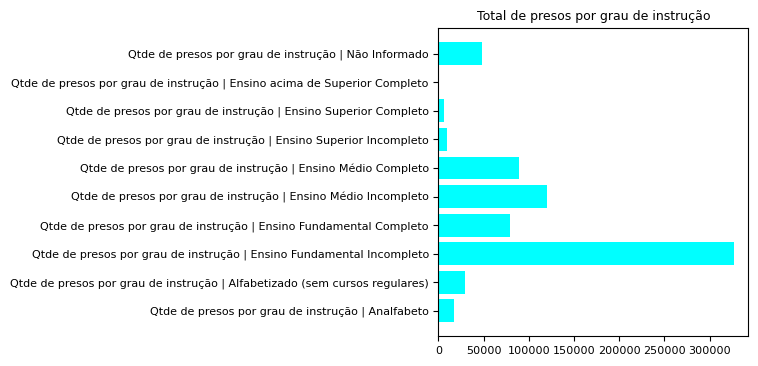

In [43]:
# creating the dataset
data = {'Qtde de presos por grau de instrução | Analfabeto': 17165.0,
                 'Qtde de presos por grau de instrução | Alfabetizado (sem cursos regulares)': 29586.0,
                'Qtde de presos por grau de instrução | Ensino Fundamental Incompleto': 326615.0,
                'Qtde de presos por grau de instrução | Ensino Fundamental Completo': 78853.0,
                  'Qtde de presos por grau de instrução | Ensino Médio Incompleto': 119963.0,
                  'Qtde de presos por grau de instrução | Ensino Médio Completo': 88533.0,
                  'Qtde de presos por grau de instrução | Ensino Superior Incompleto': 9541.0,
                  'Qtde de presos por grau de instrução | Ensino Superior Completo': 5973.0,
                  'Qtde de presos por grau de instrução | Ensino acima de Superior Completo': 807.0,
                  'Qtde de presos por grau de instrução | Não Informado': 47828.0
       }
                
 
cor = list(data.keys())
total = list(data.values())
 
fig = plt.figure(figsize=(4, 4))
 
# creating the bar plot
plt.barh(cor, total, color='aqua')
 
plt.title("Total de presos por grau de instrução", fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)

plt.savefig('preso_escola.png', dpi=300, bbox_inches='tight')
plt.show()